## Prueba #0501

### "Regresión Logísitica y algoritmo de Gradiente Descendente"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique una clase de regresión logística utilizando solo la biblioteca NumPy.
- Implementar en Python la función Sigmoid.
- Implementar en Python el Gradiente de la probabilidad logarítmica.
- Implementar en Python el algoritmo de gradiente descendente.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Leer los datos:

In [2]:
# Cargar los datos
data = load_breast_cancer()
# Variables explicativas
X = data['data']
# Volver a etquetar para que 0 = 'benign' y 1 = malignant.
Y = 1 - data['target']

In [3]:
# Dividir el conjunto de datos en entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

1). Defina las funciones 'sigmoide' y 'gradiente' para producir el resultado que se muestra a continuación:

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) #Devuelve un número entre 0 - 1 

def gradient(X, Y, beta):
    return np.dot(X.T, (beta - Y)) / Y.shape[0]


2). Defina la clase 'LogisticRegression' para producir el resultado que se muestra a continuación:

In [5]:
class LogisticRegression:
    def __init__(self, learn_rate):
       # <Tu código va aquí>
        
    def train(self, input_X, input_Y, n_epochs):
       # <YTu código va aquí>
    
    def query(self, input_X, prob=True, cutoff=0.5):
       # <Tu código va aquí>

#### Ejecutar:

In [6]:
# Hiperparámetro para el regresor.
learning_rate = 0.001

In [7]:
# Entrenar y predecir.
LR = LogisticRegression(learning_rate)
LR.train(X_train, Y_train, 2000)
Y_pred = LR.query(X_test,prob=False,cutoff=0.5)

In [8]:
# Mostrar la exactitud
acc = (Y_pred == Y_test.reshape(-1,1)).mean()
print('Accuracy : {}'.format(np.round(acc,3)))

Accuracy : 0.912


### A continuación muestro el proceso para llegar al código deseado


#### Funcion sigmoide

Es una fonción matemática que tiene una curva en forma de "S", su función es transformar los valores originales a valores entre 0 - 1.
Siendo su función:
$$
logit(x) = \frac{1}{1+ e^{-x}}
$$

La función sigmoide realiza lo mismo que el método predict_proba de python, teniendo en cuenta que le pasaremos por ejemplo X_test.

A continuación mostramos la gráfica en forma de "S".


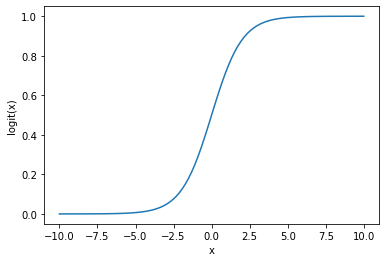

In [4]:
sigmoid = lambda x: 1 / (1 + np.exp(-x)) #La formula anterior la pasamos a código, es lo que ira en el método
x = np.linspace(-10,10,100)
y = sigmoid(x)

#Configuramos la gráfica y la imprimimos por pantalla
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('logit(x)')
plt.show()

In [9]:
sigmoid(X_test)[:,1].min()

0.9999393299669873

In [10]:
sigmoid(X_test)[:,1].max()

1.0

#### Funcion descenso de gradiente


In [17]:
w = 0.5
y_pred= w * X
cost=( y_pred - Y.reshape(-1,1)) **2  #linear regression
grad_w=2 * X * ((w * X) - Y.reshape(-1,1) ) # derevative with respect to x
grad_w

array([[ 2.87660100e+02,  8.69844000e+01,  1.48342400e+04, ...,
        -4.60362840e-01, -7.08507990e-01, -2.23662790e-01],
       [ 3.81984900e+02,  2.80232900e+02,  1.73966100e+04, ...,
        -3.37404000e-01, -4.74375000e-01, -1.70115440e-01],
       [ 3.48316100e+02,  4.09062500e+02,  1.66400000e+04, ...,
        -4.26951000e-01, -5.92062310e-01, -1.67489744e-01],
       ...,
       [ 2.42360000e+02,  7.32326400e+02,  1.15122900e+04, ...,
        -2.63492760e-01, -3.94404760e-01, -1.50284760e-01],
       [ 3.83160000e+02,  8.01588900e+02,  1.93478100e+04, ...,
        -4.59775000e-01, -6.50364310e-01, -2.32624000e-01],
       [ 6.02176000e+01,  6.02211600e+02,  2.29632640e+03, ...,
         0.00000000e+00,  8.24264100e-02,  4.95475210e-03]])

Enlace:
https://ichi.pro/es/descenso-de-gradiente-en-python-con-ejemplo-67986069776960